Linear PCA consists in a orthogonal basis transformation that can be used for dimensionality reduction. 

In the context of de-noising it is very limited: it can only de-noise linear patterns


> Kernel PCA solves this limitation. 

It makes use of a function $$\Phi$$ that maps that data from the input space : typically $$\mathbb{R}^N$$ to a feature space. 


The feature space is typically of much higher dimension than the input space.

Linear PCA is performed in the feature space. 


The transformation is linear in the feature space but non-linear in the input space.

Data in the feature space is projected onto the main principal components. 


__The difficult part is to take these projections back to the input__


Let x be a test point. $$\{x_i\}$$ are the "train" data. $$\{V^k\}$$ are the eigenvectors of the covariance matrix $$\bar{\mathbf{C}}$$


If we suppose the $$\Phi$$-images of the train data to be centered (in the feature space), the covariance matrix is $$\bar{\mathbf{C}}=\frac{1}{l}\sum_{k=1}^l\Phi(x_k)\Phi(x_k)^T$$

so an eigenvector V with eigenvalue $\lambda$ satisfies 
$$\bar{\mathbf{C}}V=\lambda V$$ 

$$\frac{1}{l}\sum_{k=1}^l(\Phi(x_k)\Phi(x_k)^T)V=\lambda V$$

$$\frac{1}{l}\sum_{k=1}^l\underbrace{(\Phi(x_k)\cdot V)}_{scalar}\Phi(x_k)=\lambda V$$

For non-zero eigenvalue $$\lambda$$ we have:

$$V=\frac{1}{l\lambda}\sum_{k=1}^l\underbrace{(\Phi(x_k)\cdot V)}_{scalar}\Phi(x_k)$$

So V is a linear combination of the $$\Phi$$-images of the training data, there exist coefficients 

$$\{\alpha_i\}_{i=1}^l$$

such that 

$$V=\sum_{i=1}^l\alpha_i \Phi(x_i)$$



how to actually compute these coefficients $$\alpha_i$$

The equation $$\lambda V=\bar{\mathbf{C}}V$$ can be written in l scalar equations 

$$\forall j \in \{1,\dots,l\} \lambda(V \cdot \Phi(x_j))=(\bar{\mathbf{C}}V\cdot \Phi(x_j))$$

$$\lambda (\sum_{i=1}^l\alpha_i\Phi(x_i) \cdot \Phi(x_j))=(\Big[\frac{1}{l}\sum_{k=1}^l(\Phi(x_k) \Phi(x_k)^T)\sum_{i=1}^l\alpha_i\Phi(x_i)\Big] \cdot \Phi(x_j))$$

$$\lambda (\sum_{i=1}^l\alpha_i\Phi(x_i) \cdot \Phi(x_j))=(\Big[\frac{1}{l}\sum_{k=1}^l\sum_{i=1}^l\alpha_i\underbrace{(\Phi(x_k) \Phi(x_k)^T)\Phi(x_i)}_{(\Phi(x_k)\cdot \Phi(x_i))\Phi(x_k)}\Big] \cdot \Phi(x_j))$$

$$\lambda (\sum_{i=1}^l\alpha_i\Phi(x_i) \cdot \Phi(x_j))=(\frac{1}{l}\sum_{k=1}^l\sum_{i=1}^l\alpha_i(\Phi(x_k)\cdot \Phi(x_i))\Phi(x_k) \cdot \Phi(x_j))$$


Now substitute 

$$\Phi(x_i) \cdot \Phi(x_j)$$

with 

$$k(x_i, x_j)$$

$$\lambda \sum_{i=1}^l\alpha_ik(x_i, x_j)=(\frac{1}{l}\sum_{k=1}^l\sum_{i=1}^l\alpha_ik(x_i, x_k)\Phi(x_k) \cdot \Phi(x_j))$$
$$\lambda \sum_{i=1}^l\alpha_ik(x_i, x_j)=\frac{1}{l}\sum_{k=1}^l\sum_{i=1}^l\alpha_ik(x_i, x_k)k(x_k, x_j)$$


Again, now substitute $$k(x_i, x_k)k(x_k, x_j)$$



with

$$K_{ik}K_{kj}$$

we have:

$$\lambda \sum_{i=1}^l\alpha_iK_{ij}=\frac{1}{l}\sum_{k=1}^l\sum_{i=1}^l\alpha_iK_{ik}K_{kj}$$
$$\lambda \sum_{i=1}^l\alpha_i\underbrace{K_{ij}}_{=K_{ji} \text{because K symmetric}}=\frac{1}{l}\sum_{k=1}^l\sum_{i=1}^l\alpha_iK_{ik}K_{kj}$$
$$\lambda (K\alpha)_j = \frac{1}{l}\sum_{k=1}^l(K\alpha)_kK_{kj}$$
$$\lambda (K\alpha)_j = \frac{1}{l}(KK\alpha)_j$$
So in a vector form we have:
$$\lambda K\alpha = \frac{1}{l}K^2\alpha$$
$$l \lambda K \alpha = K^2 \alpha$$
$$l \lambda \alpha = K \alpha$$

So

The eigenvectors $$V^k$$  can be written as $$V^k=\sum_{i=1}^l\alpha_i^k\Phi(x_i)$$ 


and the vector 



$$\alpha^k=(\alpha_1^k, \dots, \alpha_l^k)^T$$

is an eigenvector of the kernel matrix __K__ with eigenvalue 


$$l \lambda^k$$

Projections of the test point x on the $$V^k$$: 

$$\beta_k=\sum_{i=1}^l\alpha_i^kk(x,x_i)$$

only depends on the test point __x__ and the training data $$\{x_i\}_{i=1}^l$$


does not depend on the sequence 


$$z_0, \dots, z_t, \dots$$



Let n be the number of principal components and 


$$P_n$$ be the operator that 


project the $$\Phi$$-image of the test point $$\Phi(x)$$ onto the span of the eigenvectors $$\{V^k\}_{k=1}^n$$



$$P_n(\Phi(x))=\sum_{k=1}^n(\Phi(x)\cdot V^k)V^k
             =\sum_{k=1}^n\beta_k V^k$$

__Pre-image problem:__


the main difficulty is to find the pre-image of this projected vector $$P_n(\Phi(x))$$


that is to say find the vector z in the input space such that 

$$\Phi(z)=P_n(\Phi(x))$$


We do not know anything about the mapping $$\Phi$$ from the input space to the feature space


it is probably not injective and as a consequence there may not exist such a vector z in the input space 



So we have to find an approximation of the pre-image of 

$$P_n(\Phi(x))$$ 


so a vector __z__ such that the quantity


$$\rho(z)=||\Phi(z) - P_n(\Phi(x))||^2$$

is minimal. 

If the kernel is __gaussian__, that is to say in the form 

$$k(x,y)=\exp(-||x-y||^2/c)$$


we can expand the square in $$\rho(z)$$


$$\rho(z) = ||\Phi(z)||^2 - 2(\Phi(z) \cdot P_n(\Phi(x))) + ||P_n(\Phi(x)||^2$$


$$\rho(z) = k(z, z) - 2\Phi(z) \cdot \sum_{k=1}^n\beta_k \sum_{i=1}^l\alpha_i^k\Phi(x_i) + \underbrace{||P_n(\Phi(x)||^2}_{\text{does not depend on }z}$$


$$\rho(z) = \underbrace{k(z, z)}_{constant} - 2\sum_{k=1}^n\beta_k \sum_{i=1}^l\alpha_i^k\Phi(z) \cdot \Phi(x_i) + \underbrace{||P_n(\Phi(x)||^2}_{\text{does not depend on }z}$$


$$\rho(z) = \underbrace{k(z, z)}_{constant} - 2\sum_{i=1}^l\sum_{k=1}^n\beta_k \alpha_i^k k(z,x_i) + \underbrace{||P_n(\Phi(x)||^2}_{\text{does not depend on }z}$$

denote 

$$\forall i \in \{1, \dots, l\}, \gamma_i=\sum_{k=1}^n\beta_k \alpha_i^k$$

and 

$$\Omega=k(z,z) + ||P_n(\Phi(x))||^2$$


we have


$$\rho(z) = -2\sum_{i=1}^l\gamma_i k(z,x_i) + \Omega$$


Finally define 

$$\rho^{\prime}(z) = \sum_{i=1}^l\gamma_i k(z,x_i)$$


Minimizing 


$$\rho(z)$$



is the same as maximizing 

$$\rho^{\prime}(z)$$


Let 


$$z^*$$


be the maximum of 


$$\rho^{\prime}(z)$$

a necessary condition is the derivate of 

$$\nabla_z(\rho^{\prime}(z^*))=0$$

Let's compute this derivative:


$$\rho^{\prime}(z) = \sum_{i=1}^l\gamma_i k(z,x_i)$$

$$\nabla_z(\rho^{\prime})(z) = \sum_{i=1}^l\gamma_i \frac{\partial ||z-x_i||^2}{\partial z}k^{\prime}(||z-x_i||^2)$$

We have 

$$\frac{\partial ||z-x_i||^2}{\partial z} = 2(z-x_i)$$
and 


$$k^{\prime}(||z-x_i||^2)$$


denotes the derivate of the real function 


$$f(y)=e^{-y/c}$$


taken at 


$$y=||z-x_i||^2$$


so 

$$k^{\prime}(||z-x_i||^2)=-\frac{1}{c}\exp(-\frac{||z-x_i||^2}{c})=-\frac{1}{c}k(z, x_i)$$


and we have:

$$\nabla_z(\rho^{\prime}(z))=-\frac{2}{c}\sum_{i=1}^l\gamma_i(z-x_i)k(z,x_i)$$


Setting the derivative to zero we obtain:


$$\sum_{i=1}^l\gamma_i(z^*-x_i)k(z^*,x_i)=0$$

$$z^*=\frac{\sum_{i=1}^l\gamma_i x_i k(z^*,x_i)}{\sum_{i=1}^l\gamma_i k(z^*,x_i)}$$


* Iteration scheme: 


$$z_{t+1}=\frac{\sum_{i=1}^l\gamma_i x_i \exp(-\frac{||z_t-x_i||^2}{c})}{\sum_{i=1}^l\gamma_i exp(-\frac{||z_t-x_i||^2}{c})}$$


We can start with the test point: 

$$z_0 = x$$


$$\gamma_i = \sum_{k=1}^n\beta^k \alpha_i^k$$

depends on the projections of the test point __x__ on the eigenvectors 

$$V^k$$

of the covariance matrix 

$$\bar{\mathbf{C}}$$

of the training data samples 


$$\{x_i\}_{i=1}^l$$ and on the coordinates of these eigenvectors 

$$V^k$$

in the span of the 

$$\Phi$$

-images of the training data samples 


$$\{\Phi(x_i)\}_{i=1}^l$$


does not depend on the sequence 


$$z_0, \dots, z_t, \dots$$


The conclusion is that z* is a fixed point of the function 


$$f(z)=\frac{\sum_{i=1}^l\gamma_i x_i k(z,x_i)}{\sum_{i=1}^l\gamma_i k(z,x_i)}$$


this expression is valid assuming that the denominator which is equal to 


$$\sum_{i=1}^l\gamma_i k(z,x_i)=\Phi(z)\cdot P_n(\Phi(x))$$


is non-zero. 



Because the kernel __k__ is a continuous function, assuming that 

$$P_n(\Phi(x))\neq 0$$


there is a neighborhood of the extremum of 


$$\rho^{\prime}$$


where the function f is defined. 



Should we start with a good guess $$z_0$$


the following iteration scheme will converge to the fixed point of f that corresponds to the extremum of 
$$\rho^{\prime}$$


$$z_{t+1}=\frac{\sum_{i=1}^l\gamma_i x_i k(z_t,x_i)}{\sum_{i=1}^l\gamma_i k(z_t,x_i)}$$

In [39]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import math
import time
from sklearn.metrics.pairwise import rbf_kernel
%matplotlib inline

In [40]:
def createK(data, c):
    return rbf_kernel(data, data, gamma=1/c)

In [41]:
def calcBetaK(alphaK, data, x, c):
    kernel = rbf_kernel(data, x.reshape(1, -1), 1/c)
    return np.dot(alphaK, kernel)

In [42]:
def centerK(K):
    l = len(K)
    l_ones = np.ones((l, l), dtype=int) / l
    Kcentered = K - np.dot(l_ones,K)-np.dot(K,l_ones)+np.dot(l_ones,np.dot(K,l_ones))
    return Kcentered

In [43]:
def normAlpha(alpha, lambdas):
    for i,a in enumerate(alpha):
        a /= np.sqrt(lambdas[i])
    return alpha

In [44]:
def calcGammaIOpt(alpha, i, beta):
    ''' returns gamma_i = sum_{k=1}^n beta_k * alpha_i^k '''
    gammaI = 0
    alphaI = alpha.T[i]
    for k, alphaKI in enumerate(alphaI):
        gammaI += beta[k] * alphaKI
    return gammaI

In [45]:
def calcZ(alpha, data, x, c, z0, maxIters):
    z = z0
    cov_0 = np.std(data, axis=0)**2*np.identity(z0.size)
    m = np.mean(data, axis=0)
    iters=0
    beta = [calcBetaK(aK, data, x, c) for aK in alpha]
    gamma = [calcGammaIOpt(alpha, i, beta) for i in range(len(data))]
    
    while iters < maxIters:
        numerator, denom = 0, 0
        kernel = rbf_kernel(data, z.reshape(1, -1), 1/c)
        for i, xi in enumerate(data):
            gammaI = gamma[i] * kernel[i][0]
            numerator += gammaI * xi
            denom += gammaI
        if denom!=0: 
            z = numerator/denom
            iters +=1
        else:
            iters =0
            z = z0 + np.random.multivariate_normal(np.zeros(z0.size), cov_0)
            numerator, denom = 0, 0
    return z

In [46]:
def myPCA(data, test, n):
    l, d = data.shape
    C = np.zeros((d, d))
    m = np.mean(data, axis=0)
    for xi in data-m:
        C += 1/l*np.dot(xi.reshape((d, 1)), xi.reshape((d, 1)).T)
    lambdas, v = np.linalg.eigh(C)
    v = v.T
    Z = np.zeros(test.shape) # result
    for i, xi in enumerate(test-m):
        Z[i] = m+np.sum(np.array([np.dot(np.dot(xi, vi), vi) for vi in v[-n:]]), axis=0) # top n eigenvalues
    return Z

In [47]:
def myKPCA(data, test, n, c, maxIters, debug=False):
    l = len(data)
    K = centerK(createK(data, c))
    lambdas, alphas = np.linalg.eigh(K)
    alphas = alphas.T
    lambdas = lambdas/l
    lambdas, alphas = lambdas[-n:], alphas[-n:]
    alphas = normAlpha(alphas, lambdas)
    Z = np.zeros(test.shape)
    for i, xi in enumerate(test):
        Z[i] = calcZ(alphas, data, xi, c, xi, maxIters)
    return Z

1) Generate the data 

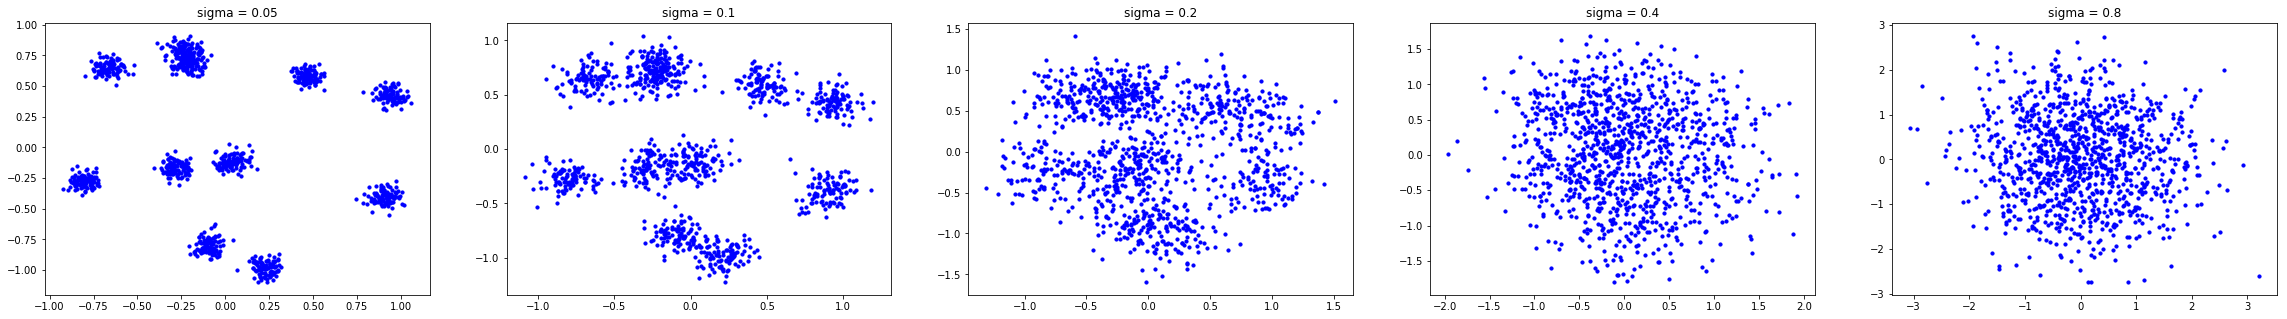

In [48]:
sigmas = np.array([0.05, 0.1, 0.2, 0.4, 0.8])
centers = np.random.uniform(-1, 1, size=(11, 2))

nTrain, nTest = 100, 33
Xtrain, Xtest = [], []

for s in sigmas:
    xtrain, xtest = [], []
    for center in centers:
        for _ in range(nTrain):
            xtrain.append(np.random.multivariate_normal(center, s**2*np.identity(2)))
        for _ in range(nTest):
            xtest.append(np.random.multivariate_normal(center, s**2*np.identity(2)))
    Xtrain.append(xtrain)
    Xtest.append(xtest)

    
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)
plt.figure(figsize=(40, 5))

for sigmaIdx in range(5):
    plt.subplot(1, 5, sigmaIdx+1)
    plt.scatter(Xtrain[sigmaIdx][:, 0], Xtrain[sigmaIdx][:, 1], c="b", s=10)
    plt.title("sigma = {}".format(sigmas[sigmaIdx]))

## 2) Linear PCA

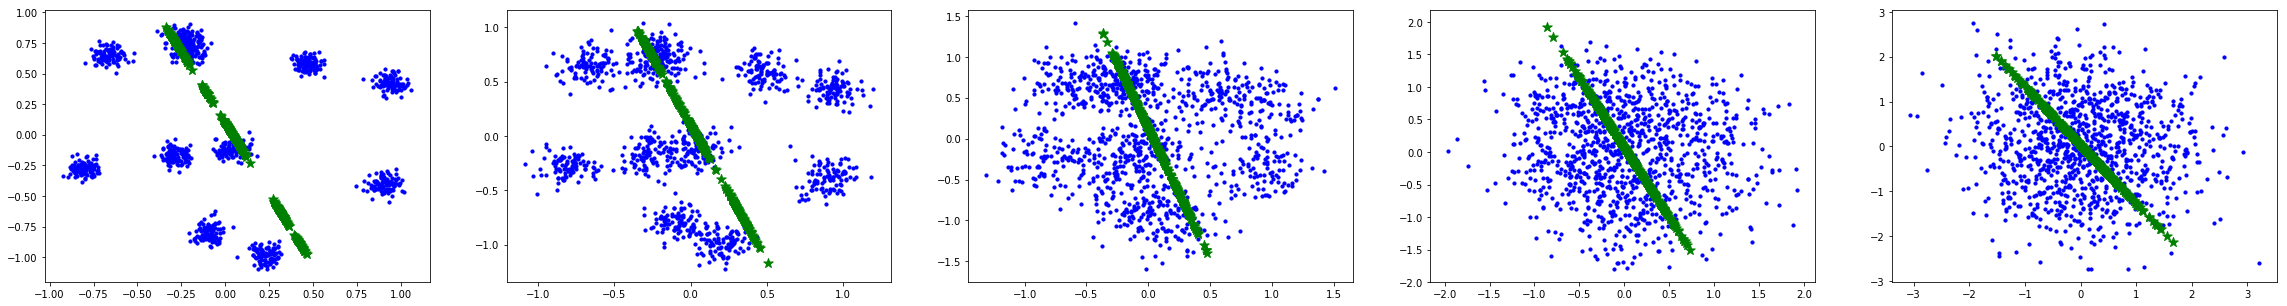

In [49]:
plt.figure(figsize=(40, 5))
Zpca = np.zeros((5, nTest*11, 2))
for sigmaIdx in range(5):
    plt.subplot(1, 5, sigmaIdx+1)
    Zpca[sigmaIdx] = myPCA(Xtrain[sigmaIdx], Xtest[sigmaIdx], 1)
    plt.scatter(Xtrain[sigmaIdx][:, 0], Xtrain[sigmaIdx][:, 1], c="b", s=10, label="train data")
    plt.scatter(Zpca[sigmaIdx][:, 0], Zpca[sigmaIdx][:, 1], c="g", marker="*", s=100, label="denoised")

## 3) Kernel PCA

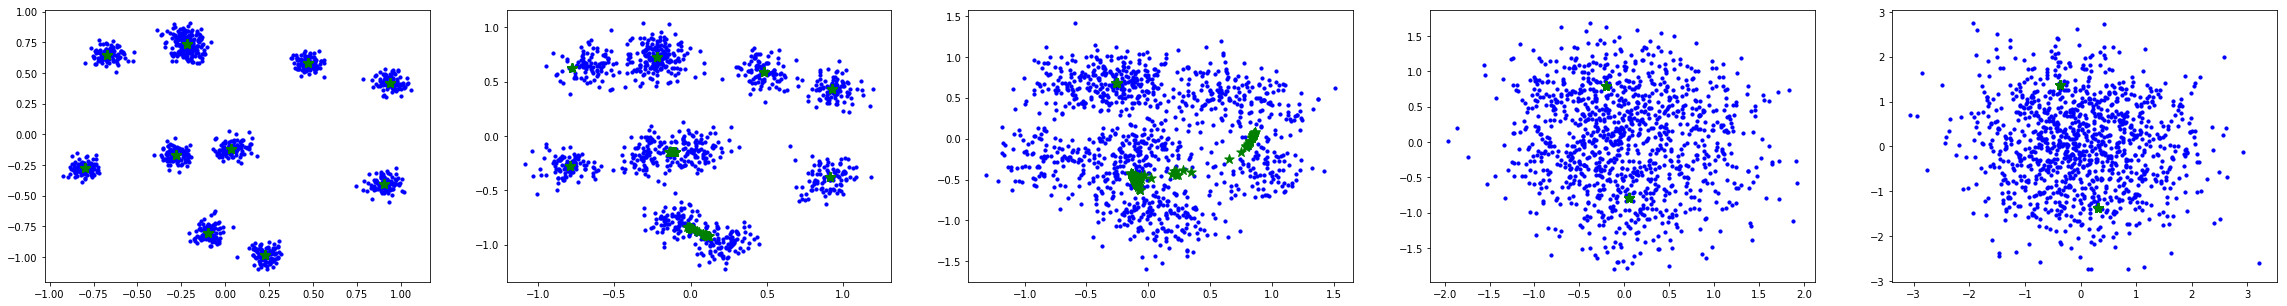

In [50]:
maxIters = 10

plt.figure(figsize=(8*5, 5))
Zkpca = np.zeros((5, nTest*11, 2))

for sigmaIdx in range(5):
    plt.subplot(1, 5, sigmaIdx+1)
    c = 2*2*sigmas[sigmaIdx]**2
    Zkpca[sigmaIdx] = myKPCA(Xtrain[sigmaIdx], Xtest[sigmaIdx], 1, c, maxIters)
    plt.scatter(Xtrain[sigmaIdx][:, 0], Xtrain[sigmaIdx][:, 1], c="b", s=10, label="train data")
    plt.scatter(Zkpca[sigmaIdx][:, 0], Zkpca[sigmaIdx][:, 1], c="g", marker="*", s=100, label="denoised")

## 4) Plots

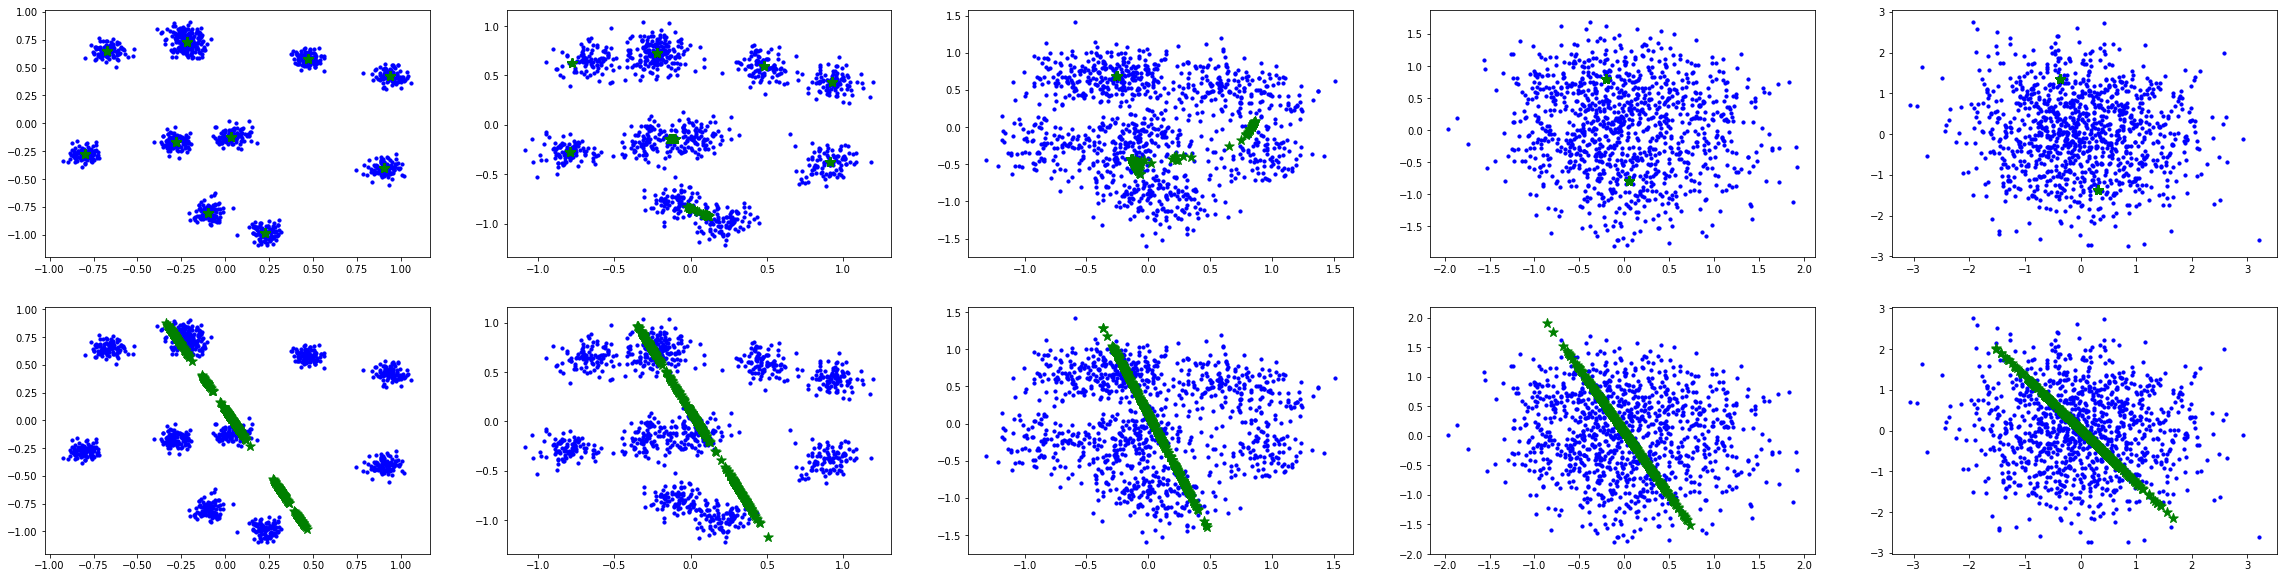

In [51]:
plt.figure(figsize=(8*5, 10))
for sigmaIdx in range(5):
    plt.subplot(2, 5, sigmaIdx+1)
    plt.scatter(Xtrain[sigmaIdx][:, 0], Xtrain[sigmaIdx][:, 1], c="b", s=10, label="train data")
    plt.scatter(Zkpca[sigmaIdx][:, 0], Zkpca[sigmaIdx][:, 1], c="g", marker="*", s=100, label="denoised")
    plt.subplot(2, 5, 5+sigmaIdx+1)
    plt.scatter(Xtrain[sigmaIdx][:, 0], Xtrain[sigmaIdx][:, 1], c="b", s=10, label="train data")
    plt.scatter(Zpca[sigmaIdx][:, 0], Zpca[sigmaIdx][:, 1], c="g", marker="*", s=100, label="denoised")

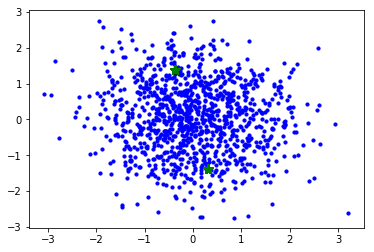

In [52]:
sigmaIdx = 4
error = 0
for i,z in enumerate(Zkpca[sigmaIdx]):
    error += np.linalg.norm(z-centers[int(i/nTest)])**2
error /= nTest*11
    
plt.scatter(Xtrain[sigmaIdx][:, 0], Xtrain[sigmaIdx][:, 1], c="b", s=10, label="train data")
plt.scatter(Zkpca[sigmaIdx][:, 0], Zkpca[sigmaIdx][:, 1], c="g", marker="*", s=100, label="denoised")

## 5) Kernel PCA with more components in reconstruction

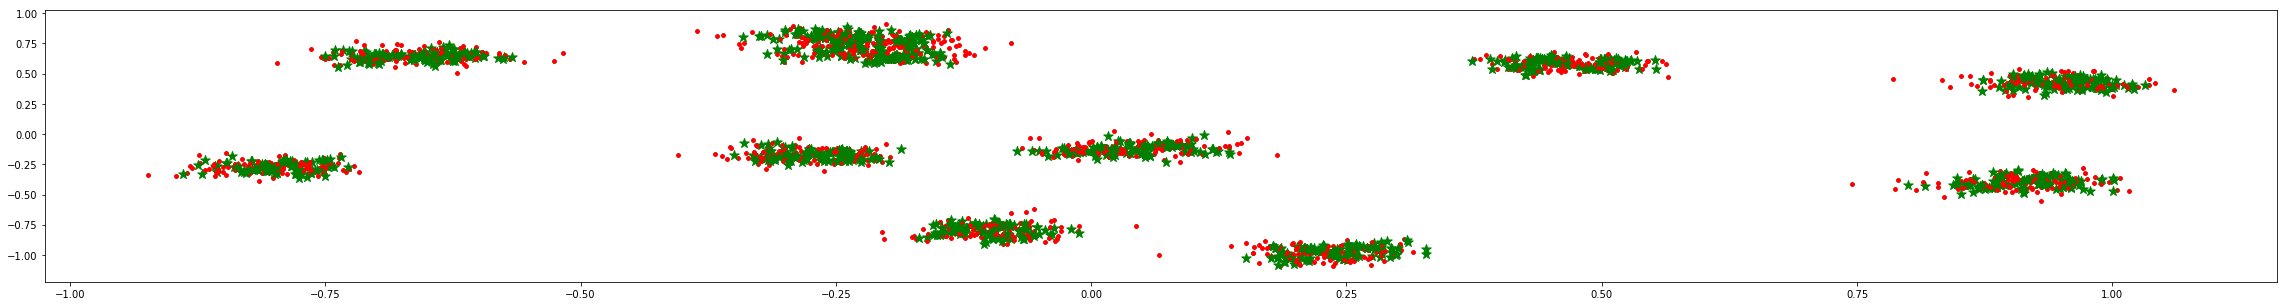

In [53]:
maxIters = 30
sigmaIdx = 0

plt.figure(figsize=(8*5, 5))
for n in [20, 30, 50, 100]:
    c = 2*2*sigmas[sigmaIdx]**2
    Zkpca = myKPCA(Xtrain[sigmaIdx], Xtest[sigmaIdx], n, c, maxIters)
    plt.scatter(Xtrain[sigmaIdx][:, 0], Xtrain[sigmaIdx][:, 1], c="r", s=10, label="train data")
    plt.scatter(Zkpca[:, 0], Zkpca[:, 1], c="g", marker="*", s=100, label="denoised")

Text(0.5,1,'test samples de-noised (green) with kernel PCA\n $\\sigma=$0.05\n n=100')

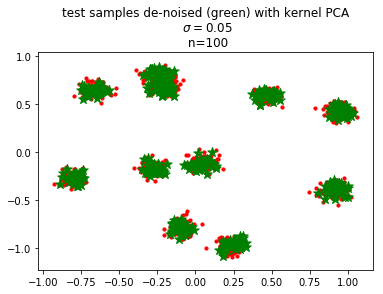

In [54]:
plt.scatter(Xtrain[0][:, 0], Xtrain[0][:, 1], c="r", s=10, label="train data")
plt.scatter(Zkpca[:, 0], Zkpca[:, 1], c="g", marker="*", s=100, label="denoised")
plt.title("test samples de-noised (green) with kernel PCA" +
          "\n $\sigma=$" + str(sigmas[sigmaIdx]) +
          "\n n=" + str(n))

# III Pre-images from initialisation to convergence

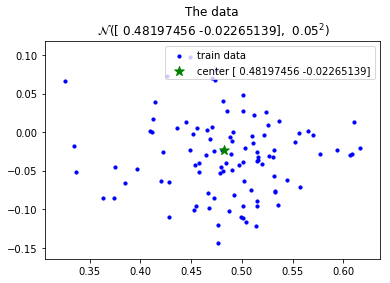

In [57]:
sigma = float(0.05)
center = np.random.uniform(-1, 1, size=2)
Xtrain = np.random.multivariate_normal(center, sigma**2*np.identity(2), size=100)
Xtest = np.random.multivariate_normal(center, sigma**2*np.identity(2), size=33)
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c="b", s=10, label="train data")
plt.scatter(center[0], center[1], c="g", s=100, marker="*", label="center " + str(center))
plt.title("The data\n $\mathcal{N}($" + str(center) +  ",  $0.05^2$)")
plt.legend()

Let's see how the sequence $z_t$ evolves. And also check if convergence is reached at the same point across different random starting points.

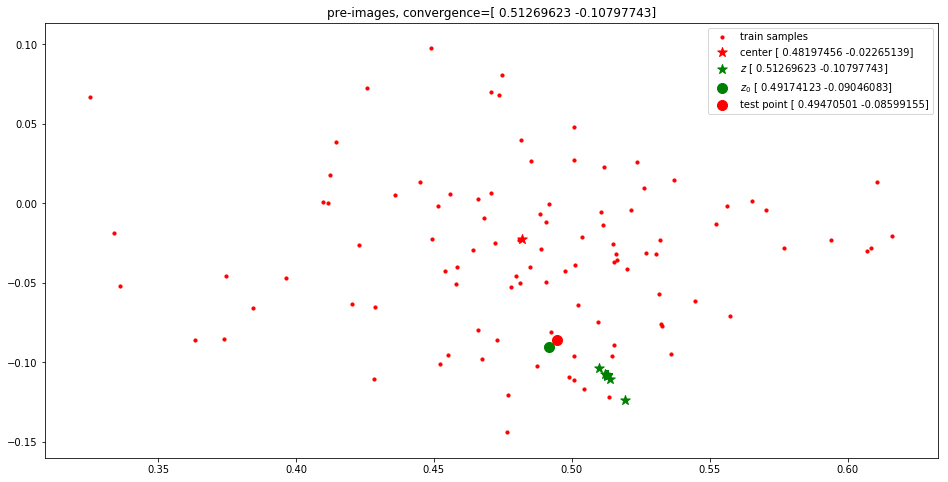

In [58]:
plt.figure(figsize=(16, 8))
n = 1 # n components for reconstruction
iters=0
maxIters = 300 # number of iterations
c = 2*2*sigma**2
l = len(Xtrain)
x = Xtest[0]
z = [list(np.random.multivariate_normal(center, sigma**2*np.identity(2)))] # random starting point
z0 = z[0] # in case of numerical instability
K = centerK(createK(Xtrain, c))
lambdas, alphas = np.linalg.eigh(K) 
alphas = alphas.T
lambdas = lambdas/l 
lambdas, alphas = lambdas[-n:], alphas[-n:]
alphas = normAlpha(alphas, lambdas)

beta = [calcBetaK(aK, Xtrain, x, c) for aK in alphas]
gamma = [calcGammaIOpt(alphas, i, beta) for i in range(len(Xtrain))]

while iters < maxIters:
    numerator, denom = 0, 0
    kernel = rbf_kernel(Xtrain, np.array(z[-1]).reshape(1, -1), 1/c)
    for i, xi in enumerate(Xtrain):
        gammaI = gamma[i] * kernel[i][0]
        numerator += gammaI * xi
        denom += gammaI
    if denom!=0: #handling numerical instability
        z.append(numerator/denom)
        iters +=1
    else:
        print("---", "instability", denom, "---")
        iters = 0
        z = list(z0 + np.random.multivariate_normal(np.zeros(2), sigma**2*np.identity(2)))
        numerator, denom = 0, 0
        
z = np.array(z)
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c="r", s=10, label="train samples")
plt.scatter(center[0], center[1], c="r", s=100, marker="*", label="center " + str(center))
plt.scatter(z[0:, 0], z[0:, 1], c="g", s=100, marker="*", label="$z$ " + str(z[-1]))
plt.scatter(z[0, 0], z[0, 1], c="g", marker="o", s=100, label="$z_0$ " + str(z[0]))
plt.scatter(x[0], x[1], c="r", s=100, label="test point " + str(x))
plt.title("pre-images, convergence=" + str(z[-1]))
plt.legend()